In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import your utility modules
from dataframe import load_dataframe, save_dataframe, load_snapshots_to_dataframe
from plot import plot_total_liquidity, plot_average_fee, plot_unique_makers
# Import any other necessary functions
from main import get_snapshot_filepaths

In [6]:
# Set up paths
directory_path = '../data'  # Update this to your data directory path
df_pickle_path = '../dataframe.pkl'  # Path where your DataFrame is saved

# Load or compute the DataFrame
if os.path.exists(df_pickle_path):
    df_stats = load_dataframe(df_pickle_path)
else:
    filepaths = get_snapshot_filepaths(directory_path)
    df_stats = load_snapshots_to_dataframe(filepaths)
    save_dataframe(df_stats, df_pickle_path)

# Display the first few rows
df_stats.head()

DataFrame loaded from ../dataframe.pkl


,total_offers,total_liquidity,average_fee,median_fee,average_order_size,median_order_size,min_order_size,max_order_size,total_unique_makers,total_fidelity_bonds,total_bond_value
timestamp,,,,,,,,,,,
2024-09-09 10:29:00,291,253015030625,542.722783,17.89578,8.694675e+08,14769529.0,27300,66641223169,290,108,2.290487e+11
2024-09-09 10:30:00,291,253015030625,542.722783,17.89578,8.694675e+08,14769529.0,27300,66641223169,290,108,2.290487e+11
2024-09-09 10:35:00,293,253182527229,536.660444,16.90000,8.641042e+08,14972700.0,27300,66641223169,292,107,2.290483e+11
2024-09-09 10:40:00,293,253182527229,536.660444,16.90000,8.641042e+08,14972700.0,27300,66641223169,292,107,2.290483e+11
2024-09-09 10:45:00,292,254146258556,537.723163,16.70000,8.703639e+08,14871114.5,27300,66641223169,291,106,2.277460e+11


Plot total liquidity

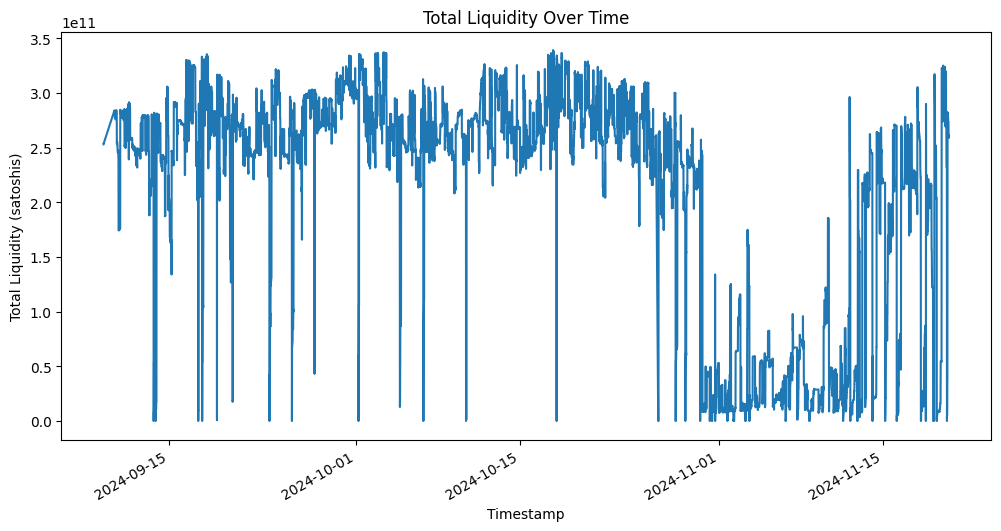

In [7]:
plt.figure(figsize=(12, 6))
df_stats['total_liquidity'].plot()
plt.title('Total Liquidity Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Total Liquidity (satoshis)')
plt.show()

Plot unique makers

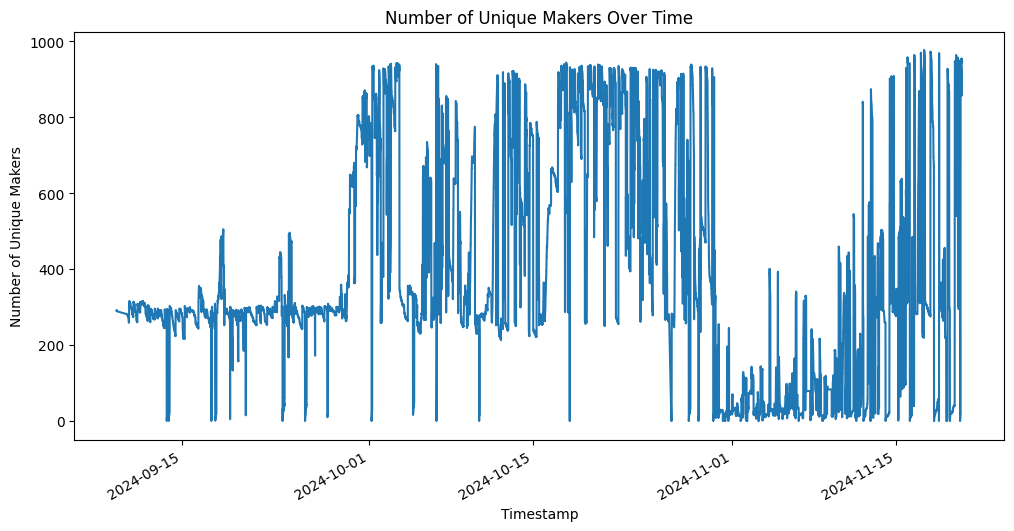

In [8]:
    plt.figure(figsize=(12, 6))
    df_stats['total_unique_makers'].plot()
    plt.title('Number of Unique Makers Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Number of Unique Makers')
    plt.show()

In [18]:
# Cell: Compute Smoothed Data

# Define window sizes
rolling_window_size = 100  # Adjust as needed
rolling_window_size_1000 = 1000  # Adjust as needed

# Rolling Mean Smoothing
df_stats['total_liquidity_smooth_100'] = df_stats['total_liquidity'].rolling(window=rolling_window_size, center=True).mean()
df_stats['total_liquidity_smooth_1000'] = df_stats['total_liquidity'].rolling(window=rolling_window_size_1000, center=True).mean()

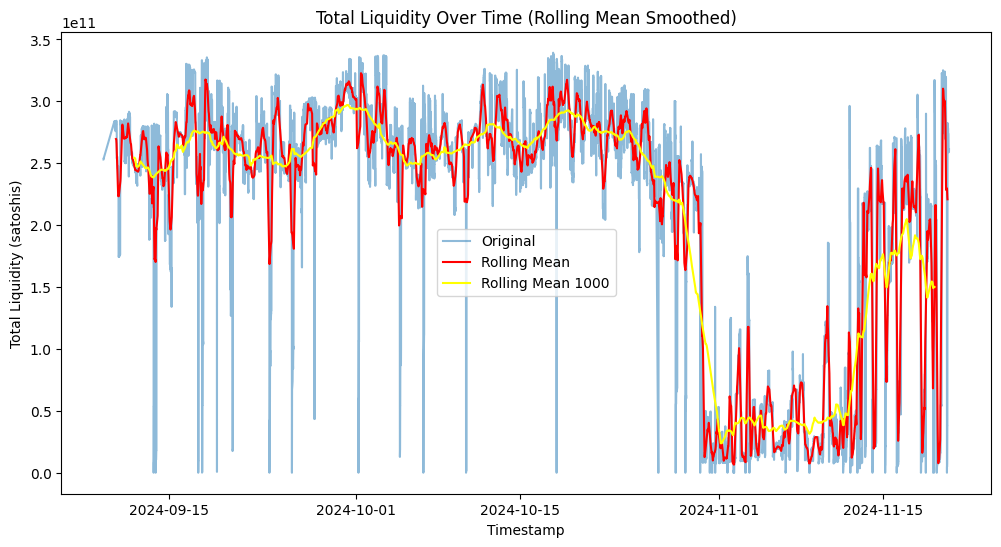

In [19]:
# Cell: Plot Total Liquidity with Rolling Mean Smoothing

plt.figure(figsize=(12, 6))
plt.plot(df_stats.index, df_stats['total_liquidity'], label='Original', alpha=0.5)
plt.plot(df_stats.index, df_stats['total_liquidity_smooth_100'], label='Rolling Mean', color='red')
plt.plot(df_stats.index, df_stats['total_liquidity_smooth_1000'], label='Rolling Mean 1000', color='yellow')
plt.title('Total Liquidity Over Time (Rolling Mean Smoothed)')
plt.xlabel('Timestamp')
plt.ylabel('Total Liquidity (satoshis)')
plt.legend()
plt.show()


In [20]:
df_stats['total_unique_makers_smooth_100'] = df_stats['total_unique_makers'].rolling(window=rolling_window_size, center=True).mean()
df_stats['total_unique_makers_smooth_1000'] = df_stats['total_unique_makers'].rolling(window=1000, center=True).mean()


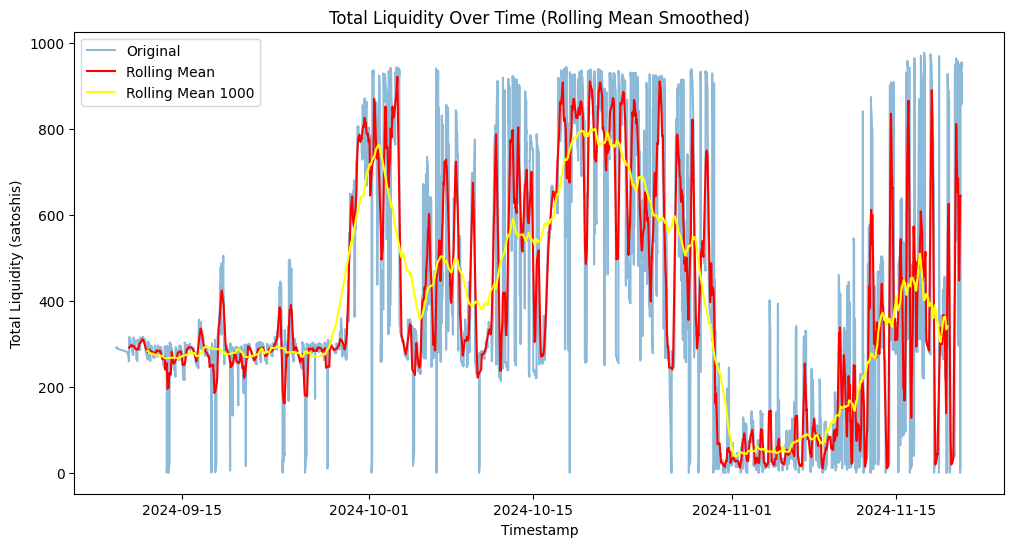

In [21]:
# Cell: Plot Total Makers with Rolling Mean Smoothing

plt.figure(figsize=(12, 6))
plt.plot(df_stats.index, df_stats['total_unique_makers'], label='Original', alpha=0.5)
plt.plot(df_stats.index, df_stats['total_unique_makers_smooth_100'], label='Rolling Mean', color='red')
plt.plot(df_stats.index, df_stats['total_unique_makers_smooth_1000'], label='Rolling Mean 1000', color='yellow')
plt.title('Total Liquidity Over Time (Rolling Mean Smoothed)')
plt.xlabel('Timestamp')
plt.ylabel('Total Liquidity (satoshis)')
plt.legend()
plt.show()


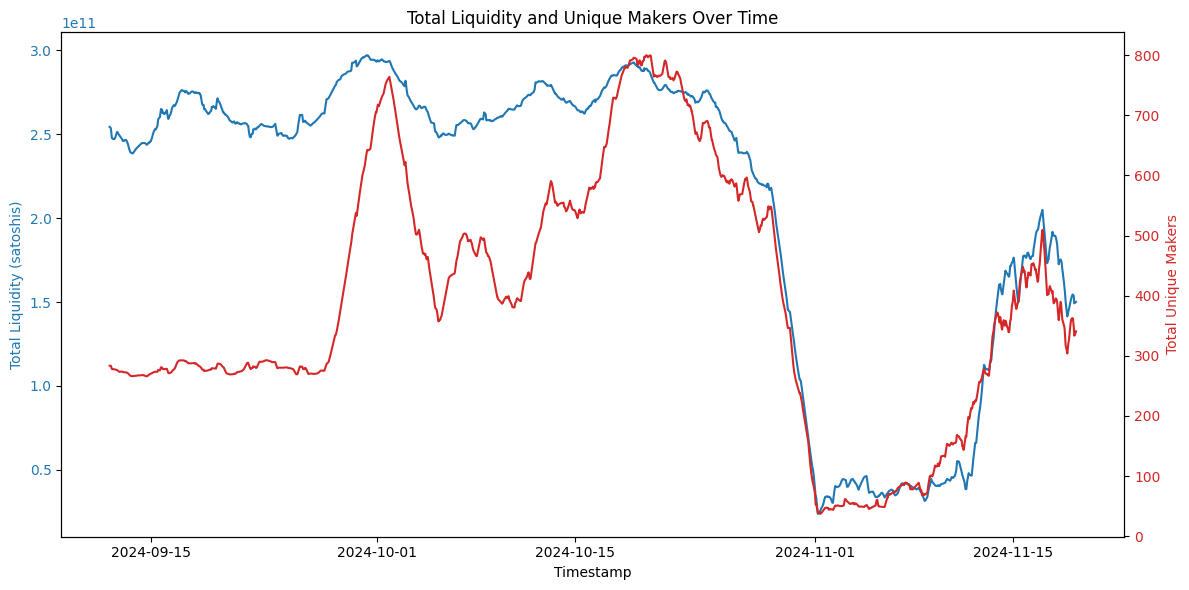

In [23]:
# Plotting both datasets with twin axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total liquidity on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Total Liquidity (satoshis)', color=color)
ax1.plot(df_stats.index, df_stats['total_liquidity_smooth_1000'], color=color, label='Total Liquidity')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot total unique makers on the secondary y-axis
color = 'tab:red'
ax2.set_ylabel('Total Unique Makers', color=color)
ax2.plot(df_stats.index, df_stats['total_unique_makers_smooth_1000'], color=color, label='Total Unique Makers')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and legend
plt.title('Total Liquidity and Unique Makers Over Time')
fig.tight_layout()
plt.show()